<a href="https://colab.research.google.com/github/reinanbrNotebooks/Colab_Notebooks/blob/main/grade_termodinamica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install animateplot

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from animateplot import AnimatePlot as ap
import statistics as sts

In [4]:
from collections import Counter

def count_matrix(img):
  base_matriz = []
  for j in img:
    for i in j:
      base_matriz.append(i)
  return Counter(base_matriz),len(base_matriz)

def freq_count(img):
  count, size = count_matrix(img)
  res = {}
  for key in count.keys():
    #print(key,count[key])
    res[key] = count[key]/size
  return res


def stdev_matrix(img):
  res = []
  for j in img:
    for i in j:
      res.append(i)
  return sts.stdev(res)


def median_matrix(img):
  res = []
  for j in img:
    for i in j:
      res.append(i)
  return sts.median(res)

def avarage_matrix(img):
  res = []
  for j in img:
    for i in j:
      res.append(i)
  return sts.mean(res)

def mode_matrix(img):
  res = []
  for j in img:
    for i in j:
      res.append(i)
  return sts.mode(res)

def entropy(img):
  freq = freq_count(img)
  res = 0
  for f in freq.values():
    #print(f)
    res += - f * np.log2(f)
  return res

def H(img):
  res = []
  for j in img:
    for i in j:
      res.append(i)
  res = np.array(res)
  pk = res/res.sum()
  s = np.sum(-pk*np.log2(pk))
  return s

In [16]:
img.sum()



60000.0

In [5]:
def generate_matriz(N):
  limit_i = N
  matriz_base = np.ones((N,2*N))

  j_n = 0
  for j in matriz_base:
    i_n = 0
    for i in j:
      n = 1
      if i_n>=limit_i:
        n = 50
      else:
        n = 100
      matriz_base[j_n][i_n] = n
      i_n = i_n + 1
    j_n = j_n + 1
  return matriz_base

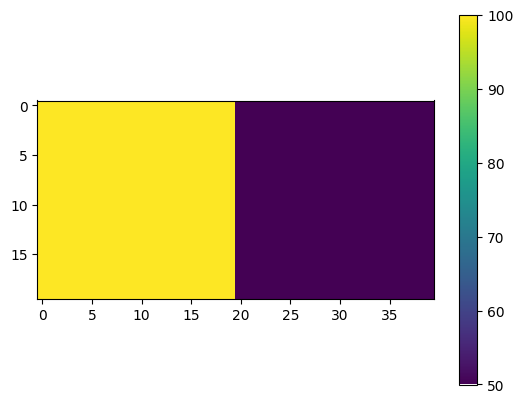

In [6]:
img = generate_matriz(20)

plt.imshow(img)
plt.colorbar()

In [ ]:
img

In [7]:
def way_to(img,N):
  len_j = len(img)
  len_i = len(img[0])
  new_img = np.copy(img)
  j_n = 0
  for x in range(N):
    j_n = 0
    for j in range(len_j):
      #varrendo pra direita
      i_n = 0
      for i in range(len_i):
        if new_img[j_n][i_n-1] > new_img[j_n][i_n]:
            new_img[j_n][i_n-1] = new_img[j_n][i_n-1] - 1 #new_img[j_n][i_n-1]*.5
            new_img[j_n][i_n] = new_img[j_n][i_n] + 1 # new_img[j_n][i_n-1]*.5


        i_n += 1
      #varrendo pra esquerda
      i_n = 0
      for i in range(len_i):

        if new_img[j_n][i_n-1] < new_img[j_n][i_n]:
            new_img[j_n][i_n-1] = new_img[j_n][i_n-1] + 1 #new_img[j_n][i_n]*.5
            new_img[j_n][i_n] = new_img[j_n][i_n] - 1 #new_img[j_n][i_n]*.5
        i_n += 1

      j_n += 1
  return new_img




In [8]:
from scipy.stats import entropy as ent

def generate_entropy_to_zero(img):

  N = 1
  new_img = way_to(img,N)
  std = stdev_matrix(new_img)
  mod = mode_matrix(new_img)
  s =H(new_img)
  #print(s)

  new_img_list = [new_img]
  std_list = [std]
  mod_list = [mod]
  s_list = [s]
  N_list = [N]

  while(std>0):
    new_img = way_to(img,N)
    new_img_list.append(new_img)

    std = stdev_matrix(new_img)
    std_list.append(std)

    mod = mode_matrix(new_img)
    mod_list.append(mod)

    s = H(new_img)
    s_list.append(s)

    N += 1
    N_list.append(N)

    print(f"N = {N} -> [s={s} | mod={mod} | std={std}]")

  return new_img_list,s_list,mod_list,std_list,N_list

new_img_list, s_list, mod_list, std_list, N_list = generate_entropy_to_zero(img)

N = 2 -> [s=9.56280431092107 | mod=100.0 | std=24.91738539893178]
N = 3 -> [s=9.563456598012925 | mod=100.0 | std=24.818742160977184]
N = 4 -> [s=9.564108885104778 | mod=100.0 | std=24.719705293292517]
N = 5 -> [s=9.564761172196631 | mod=100.0 | std=24.620270045663627]
N = 6 -> [s=9.565413459288486 | mod=100.0 | std=24.520431571560266]
N = 7 -> [s=9.56606574638034 | mod=99.0 | std=24.4201849253796]
N = 8 -> [s=9.566718033472196 | mod=99.0 | std=24.31952505958751]
N = 9 -> [s=9.567370320564049 | mod=99.0 | std=24.218446821752888]
N = 10 -> [s=9.568022607655902 | mod=99.0 | std=24.116944951470124]
N = 11 -> [s=9.568674894747755 | mod=99.0 | std=24.015014077164476]
N = 12 -> [s=9.569298606588955 | mod=99.0 | std=23.916835467374586]
N = 13 -> [s=9.569922318430155 | mod=99.0 | std=23.818252169723237]
N = 14 -> [s=9.570546030271355 | mod=99.0 | std=23.719259138252706]
N = 15 -> [s=9.571169742112556 | mod=99.0 | std=23.619851221263932]
N = 16 -> [s=9.571793453953756 | mod=99.0 | std=23.520023

Text(0.5, 1.0, 'Variação da Entropia')

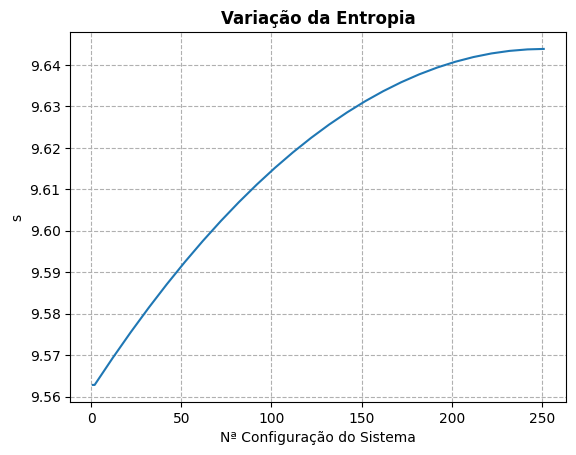

In [14]:
plt.plot(N_list,s_list)
plt.grid(linestyle='--')
plt.ylabel('s')
plt.xlabel('Nª Configuração do Sistema')
plt.title("Variação da Entropia",fontweight='bold')

Text(0.5, 1.0, 'Variação do Desvio Padrão')

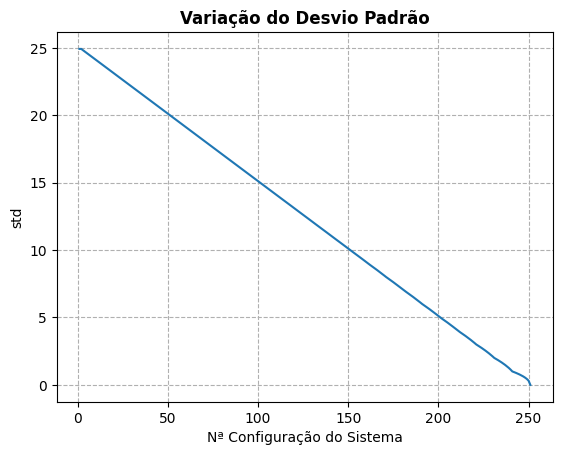

In [15]:
plt.plot(N_list,std_list)
plt.grid(linestyle='--')
plt.ylabel('std')
plt.xlabel('Nª Configuração do Sistema')
plt.title("Variação do Desvio Padrão",fontweight='bold')

Text(0.5, 1.0, 'Variação da Moda')

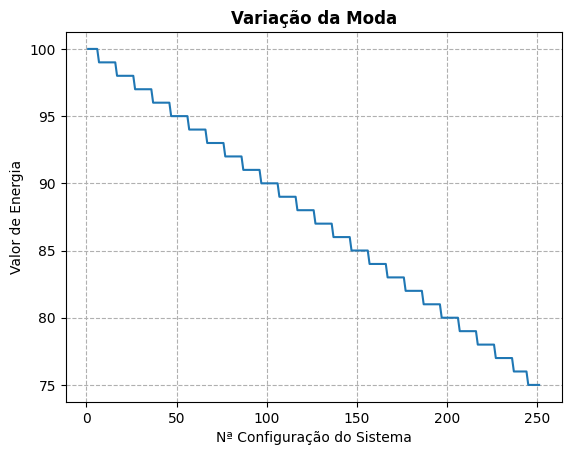

In [21]:
plt.plot(N_list,mod_list)
plt.grid(linestyle='--')
plt.ylabel('Valor de Energia')
plt.xlabel('Nª Configuração do Sistema')
plt.title("Variação da Moda",fontweight='bold')

In [ ]:
new_img_list[0].sum()==new_img_list[-1].sum()

True

In [ ]:
!pip3 install animateplot

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Limits for the extent
x_start = 0
x_end = 40
y_start = 0
y_end = 20

extent = [x_start, x_end, y_start, y_end]
size = 40


base_img = new_img_list[0]
norm = plt.Normalize(vmin=base_img.min(), vmax=base_img.max())
ds = np.gradient(s_list)

def plot_main(i,plt):
  img_ = np.copy(new_img_list[i])
  fig = plt.figure(figsize=(16, 12))
  ax = fig.add_subplot(111)
  cx = plt.imshow(plt.cm.rainbow(norm(img_)),cmap=plt.cm.rainbow,extent=extent,origin='lower', interpolation='None')
  ax = plt.gca()
  ax.set_xticks(np.arange(0, 40, 1))
  ax.set_yticks(np.arange(0, 20, 1))
  ax.set_xticklabels(np.arange(0, 40, 1))
  ax.set_yticklabels(np.arange(0, 20, 1))
  plt.xlabel("x")
  plt.ylabel("y")
  plt.grid(c='black',ls='--',lw=1)

  s_ = s_list[i]

  mod_ = mod_list[i]
  std_ = std_list[i]


  plt.title(f"Configuração de Energia dos Cobogós no Estágio nº{i}\nEntropia={s_:.3f} | dS={ds[i]} | Desvio Padrão={std_:.3f} | Moda={mod_:.1f}",fontweight='bold')

  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.05)

  v1 = np.linspace(0.45,1.,10)
  cbr = plt.colorbar(cx,cax=cax)
  ticks = cbr.get_ticks()
  cbr.set_label('Energia em Joules',fontweight='bold')
  cbr.set_ticklabels([f"{int(j*100)} Joules" for j in ticks])

    # Add the text
  jump_x = (x_end - x_start) / (2.0 * size)
  jump_y = (y_end - y_start) / (2.0 * size)
  x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
  y_positions = np.linspace(start=y_start, stop=y_end, num=20, endpoint=False)

  for y_index, y in enumerate(y_positions):
      for x_index, x in enumerate(x_positions):
          label = img_[y_index][x_index]
          text_x = x + jump_x
          text_y = y + jump_y
          ax.text(text_x, text_y, label,fontweight='bold',size=7, color='black', ha='center', va='center')


  return plt


#plot_main(0,plt)
animate = ap(N_list,plot_main)
animate.render_cache()
animate.render_mp4('energy_grade.mp4',fps=6)

  cbr.set_ticklabels([f"{int(j*100)} Joules" for j in ticks])



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

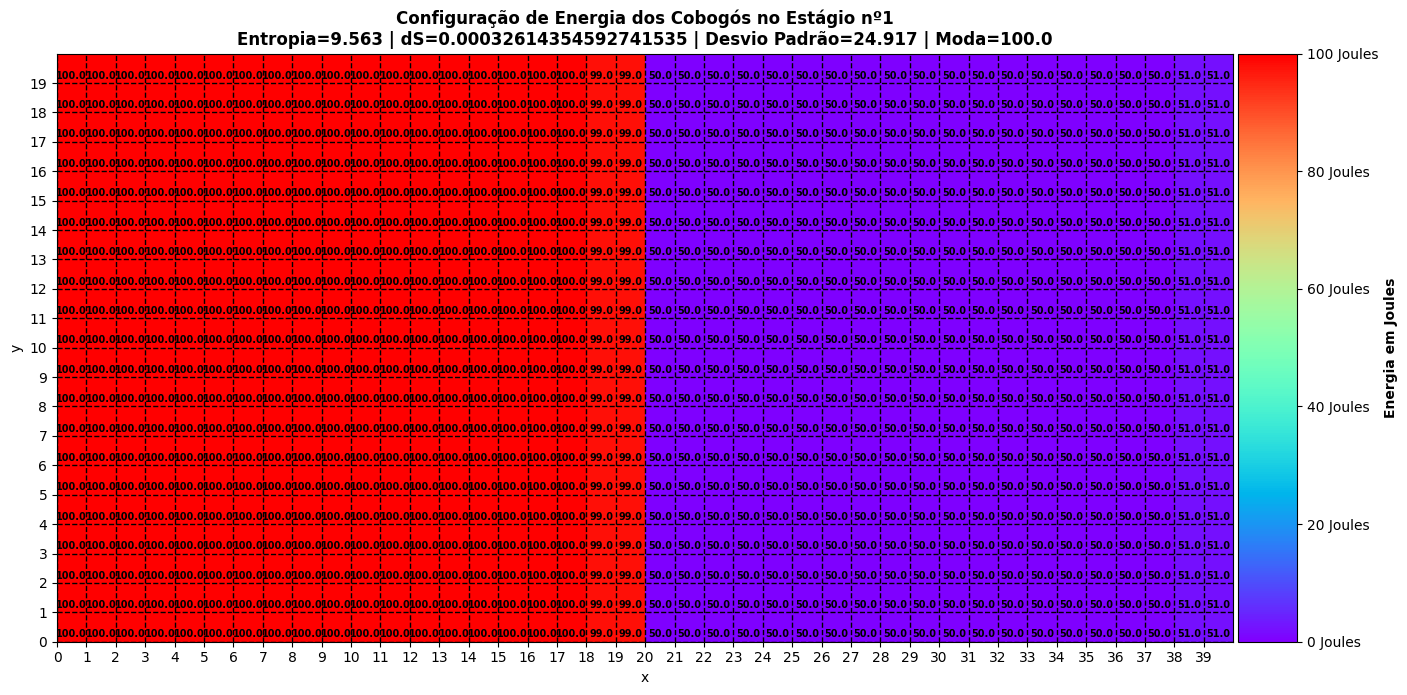

In [25]:
plot_main(1,plt)

In [ ]:

N = 300
n = range(1,N+1)
entr = [entropy(way_to(img,i)) for i in n]
std = [stdev_matrix(way_to(img,i)) for i in n]
mod = [ mode_matrix(way_to(img,i)) for i in n]
new_img = way_to(img,N)

# ploting
plt.figure(figsize=(16, 9))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,3,4)
ax3 = plt.subplot(2,3,5)
ax4 = plt.subplot(2,3,6)


cax = ax1.imshow(new_img)
plt.colorbar(cax)
ax2.plot(n,entr)
ax3.plot(n,std)
ax4.plot(n,mod)
#new_img


NameError: name 'entropy' is not defined

In [ ]:
print(sum(img[0]))
print(sum(new_img[10]))

3000.0
3000.0


In [ ]:
entropy(new_img)

1.0


0.0